In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [3]:
df[['job_title_short','job_skills']].head(3)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."


In [5]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

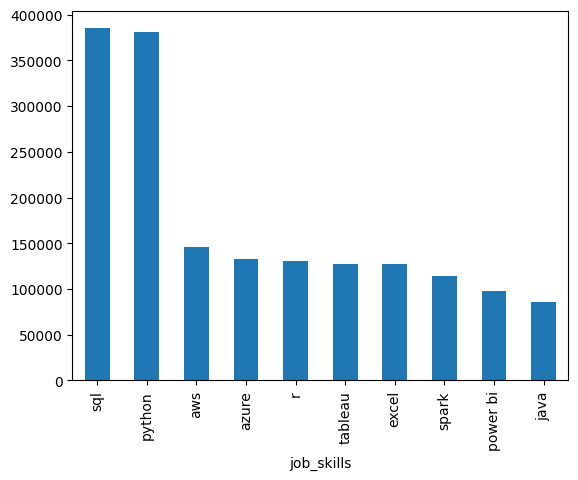

In [9]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [11]:
skills_count=df_exploded.groupby(['job_title_short','job_skills']).size()

In [12]:
type(skills_count)

pandas.core.series.Series

In [15]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count',ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


In [16]:
job_title = 'Data Engineer'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skills)
df_skill_final

,job_title_short,job_skills,skill_count
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
686,Data Engineer,aws,62049
687,Data Engineer,azure,60674
860,Data Engineer,spark,53656
763,Data Engineer,java,35559
770,Data Engineer,kafka,29073
755,Data Engineer,hadoop,28815
848,Data Engineer,scala,28716
712,Data Engineer,databricks,27477


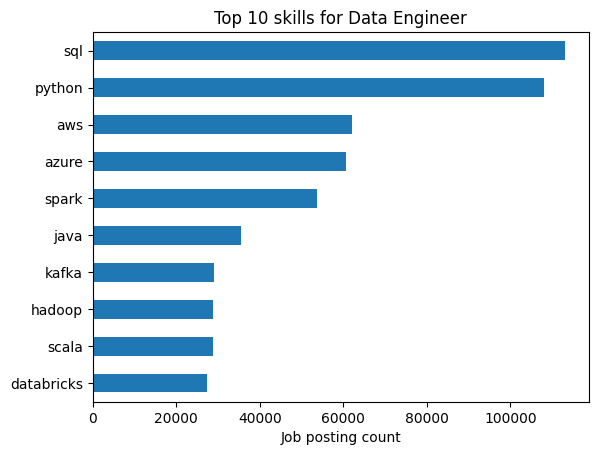

In [20]:
df_skill_final.plot(kind = 'barh',x = 'job_skills',y = 'skill_count')
# to invert axis instead doing tail() or setting ascending = True here --> df_skills_count = df_skills_count.sort_values(by='skill_count',ascending=False)
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} skills for {job_title}")
plt.xlabel("Job posting count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()